### Transient Diffusion (Boundary Value Problem - BVP)

$\frac{∂C}{∂t}=D \nabla^2C$

$\frac{∂}{∂t}C(z,t)=D\frac{∂^2}{∂z^2}C(z,t)$ (1D)


We approximate the temporal (index j) and spatial derivative (index j) as:

$\frac{∂C}{∂t}|_{i,j} \approx \frac{C_{i,j+1}-C_{i,j}}{\Delta t}$

$\frac{∂^2C}{∂z^2}|_{i,j} \approx \frac{C_{i+1,j}-2C_{i,j}+C_{i-1,j}}{\Delta z^2}$

Here, we discretize this equation in both time and space to arrive to the solution. Note that we cannot use the method of lines here because we have the derivative-based boundary condtion.

We solve for the unknown solution at a later time step as:

\\(  C_{{i},{j+1}} = aC_{{i+1},{j}} + \left( 1-2a \right)C_{{i},{j}} + aC_{{i-1},{j}} \\)

where \\(  a = D\frac{\Delta t}{\Delta z^2} \\)

**Data**

- Length of wall: L = 1 m

- Initial condition: \\(  C_0(z) =0 \\)

- Boundary condition 1: \\(  C(0, t) = 0.1 \\)

- Boundary condition 2:  \\(  \frac{\partial C}{\partial z} \left( L,t \right) = 0\\)

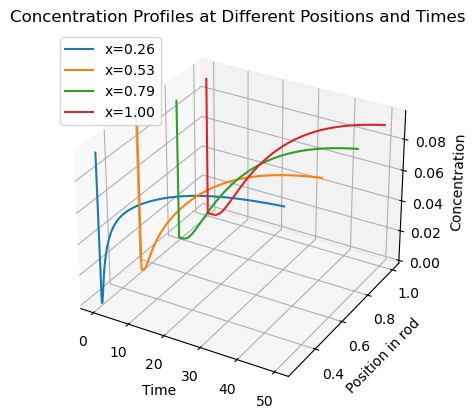

In [2]:
import numpy as np
import matplotlib.pyplot as plt

zpoints = 20                         # spatial grid size, index i
zEnd = 1.0                           # length of rod
z = np.linspace(0, zEnd, zpoints)    # position along the rod
dz = zEnd /(zpoints-1)               # discretization for spatial direction

C0t = 0.1                            # concentration at z = 0
D = 0.02

tpoints = 1000                       # time grid size, index j
tEnd = 50.0                          # time to stop calculations
t = np.linspace(0, tEnd, tpoints)    
dt = tEnd/(tpoints-1)                # discretization for temporal direction

alpha = D*dt/dz**2                   # calculate the value of alpha

C_xt = []                            # container for all the time steps
C = np.zeros(z.shape)                # create the array for the concentration profile based on the positions along the rod
C[0] = C0t                           # initial condition at z = 0                      
C_xt += [C]                          # add concentration profile for the 1st time step

for j in np.arange(1, tpoints):      # you are going to iterate in time 
    u = C.copy()
    u[0] = C0t                       # initial condtion at z = 0
    u[1:-1] = alpha*C[2:] + (1 - 2 * alpha) * C[1:-1] + alpha * C[:-2]
    u[-1] = u[-2]                    # derivative boundary condtion at flux = 0
    C[:] = u                         # update the array to go the next iteration
    C_xt += [u]                      # put it in time-step container


C_xt = np.array(C_xt)

# 3D Plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in [5, 10, 15, 19]:
    ax.plot(t, z[i]*np.ones(tpoints), C_xt[:, i], label='x={0:1.2f}'.format(z[i]))

ax.set_xlabel('Time')
ax.set_ylabel('Position in rod')
ax.set_zlabel('Concentration')
ax.set_title('Concentration Profiles at Different Positions and Times')
ax.legend(loc='best')

plt.show()